# Company Earnings Time Series

In [1]:
!pip install alpha_vantage
!pip install --upgrade statsmodels
!pip install prophet

In [2]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [3]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local **library**

In [4]:
try:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Insert the directory to syspath
    import sys
    sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')
except:
    pass

In [5]:
from time_series_utils import timeseries_evaluation_metrics_func, timeseries_RMSE_calc, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model

Importing plotly failed. Interactive plots will not work.


## Google NetIncome Time Series

In [6]:
from alpha_vantage.fundamentaldata import FundamentalData

In [7]:
api_key = None
try:
  with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()
except:
    with open('ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()

In [8]:
fun_dat = FundamentalData(key=api_key)

In [9]:
googl_inc = fun_dat.get_income_statement_quarterly(symbol='GOOGL')

In [10]:
df2 = pd.DataFrame(googl_inc[0])

In [11]:
df2.columns

Index(['fiscalDateEnding', 'reportedCurrency', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [12]:
df2

fiscalDateEnding reportedCurrency  grossProfit totalRevenue costOfRevenue  \
0        2021-12-31              USD  42152000000  75140000000   32988000000   
1        2021-09-30              USD  37307000000  64928000000   27621000000   
2        2021-06-30              USD  35653000000  61880000000   26227000000   
3        2021-03-31              USD  31211000000  55314000000   24103000000   
4        2020-12-31              USD  30038000000  56118000000   26080000000   
5        2020-09-30              USD  25013000000  46130000000   21117000000   
6        2020-06-30              USD  19744000000  38297000000   18553000000   
7        2020-03-31              USD  22177000000  41159000000   18982000000   
8        2019-12-31              USD  24855000000  45569000000   21020000000   
9        2019-09-30              USD  22935000000  40503000000   17568000000   
10       2019-06-30              USD  21749000000  39045000000   17296000000   
11       2019-03-31              USD  20327000000  36339000000   16012000000   
12       2018-12-31              USD  21358000000  39276000000   17918000000   
13       2018-09-30              USD  19459000000  33740000000   14281000000   
14       2018-06-30              USD  18774000000  32657000000   13883000000   
15       2018-03-31              USD  17679000000  31146000000   13467000000   
16       2017-12-31              USD  18056000000  32323000000   14267000000   
17       2017-09-30              USD  16624000000  27772000000   11148000000   
18       2017-06-30              USD  15637000000  26010000000   10373000000   
19       2017-03-31              USD  14955000000  24750000000    9795000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 32988000000     21885000000                     11744000000   
1                 27621000000     21031000000                      8772000000   
2                 26227000000     19361000000                      8617000000   
3                 24103000000     16437000000                      7289000000   
4                 26080000000     15651000000                      8145000000   
5                 21117000000     11213000000                      6987000000   
6                 18553000000      6383000000                      6486000000   
7                 18982000000      7977000000                      7380000000   
8                 21020000000      9266000000                      8567000000   
9                 17568000000      9177000000                      7200000000   
10                17296000000      9180000000                      6255000000   
11                16012000000      6608000000                      5993000000   
12                17918000000      8221000000                      7121000000   
13                14281000000      8625000000                      5917000000   
14                13883000000      3045000000                      5782000000   
15                13467000000      7633000000                      5639000000   
16                14267000000      7696000000                      6086000000   
17                11148000000      7782000000                      4637000000   
18                10373000000      4132000000                      4597000000   
19                 9795000000      6568000000                      4445000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
0              8708000000       20452000000  ...         None   
1              7694000000       16466000000  ...         None   
2              7675000000       16292000000  ...         None   
3              7485000000       14774000000  ...         None   
4              7022000000       15167000000  ...         None   
5              6856000000       13843000000  ...         None   
6              6875000000       13361000000  ...         None   
7              6820000000       14200000000  ...         None   
8              7222000000       157

In [13]:
# make it ascending 
df2 = df2[::-1]

In [14]:
df2.rename(columns={'fiscalDateEnding': 'time'},inplace=True)
df2.time = pd.to_datetime(df2.time)
df2.dtypes

time                                 datetime64[ns]
reportedCurrency                             object
grossProfit                                  object
totalRevenue                                 object
costOfRevenue                                object
costofGoodsAndServicesSold                   object
operatingIncome                              object
sellingGeneralAndAdministrative              object
researchAndDevelopment                       object
operatingExpenses                            object
investmentIncomeNet                          object
netInterestIncome                            object
interestIncome                               object
interestExpense                              object
nonInterestIncome                            object
otherNonOperatingIncome                      object
depreciation                                 object
depreciationAndAmortization                  object
incomeBeforeTax                              object
incomeTaxExp

In [15]:
df2.head()

time reportedCurrency  grossProfit totalRevenue costOfRevenue  \
19 2017-03-31              USD  14955000000  24750000000    9795000000   
18 2017-06-30              USD  15637000000  26010000000   10373000000   
17 2017-09-30              USD  16624000000  27772000000   11148000000   
16 2017-12-31              USD  18056000000  32323000000   14267000000   
15 2018-03-31              USD  17679000000  31146000000   13467000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
19                 9795000000      6568000000                      4445000000   
18                10373000000      4132000000                      4597000000   
17                11148000000      7782000000                      4637000000   
16                14267000000      7696000000                      6086000000   
15                13467000000      7633000000                      5639000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
19             3942000000        8387000000  ...         None   
18             4172000000        8769000000  ...         None   
17             4205000000        8842000000  ...         None   
16             4306000000       10392000000  ...         None   
15             5039000000       10678000000  ...         None   

   depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
19                  1503000000      6819000000       1393000000   
18                  1625000000      4377000000        853000000   
17                  1761000000      7979000000       1247000000   
16                  2026000000      8018000000      11038000000   
15                  1986000000     10543000000       1142000000   

   interestAndDebtExpense netIncomeFromContinuingOperations  \
19               25000000                        5377000000   
18               21000000                        3511000000   
17               27000000                        6701000000   
16               36000000                       -3083000000   
15               30000000                        9401000000   

   comprehensiveIncomeNetOfTax         ebit       ebitda    netIncome  
19                  5659000000   6844000000   8347000000   5426000000  
18                  3965000000   4398000000   6023000000   3524000000  
17                  7714000000   8006000000   9767000000   6732000000  
16                 -3266000000   8054000000    256000000  -3020000000  
15                  9821000000  10573000000  12559000000   9401000000  

[5 rows x 26 columns]

## We will pick netIncome as our target variable

In [16]:
df2.netIncome = df2.netIncome.astype(str)
df2.netIncome = df2.netIncome.apply(lambda x: x[:-3])

## We scale the netIncome into unit of thousands but cut off 3 zeros. To avoid situation of int to big to convert to C long error.

In [17]:
df2.netIncome = df2.netIncome.astype(int)
df2 = df2[['time', 'netIncome']]
df2 = df2.set_index('time')
df2 = df2.asfreq('Q')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-03-31 to 2021-12-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   netIncome  20 non-null     int32
dtypes: int32(1)
memory usage: 240.0 bytes


<AxesSubplot:xlabel='time'>

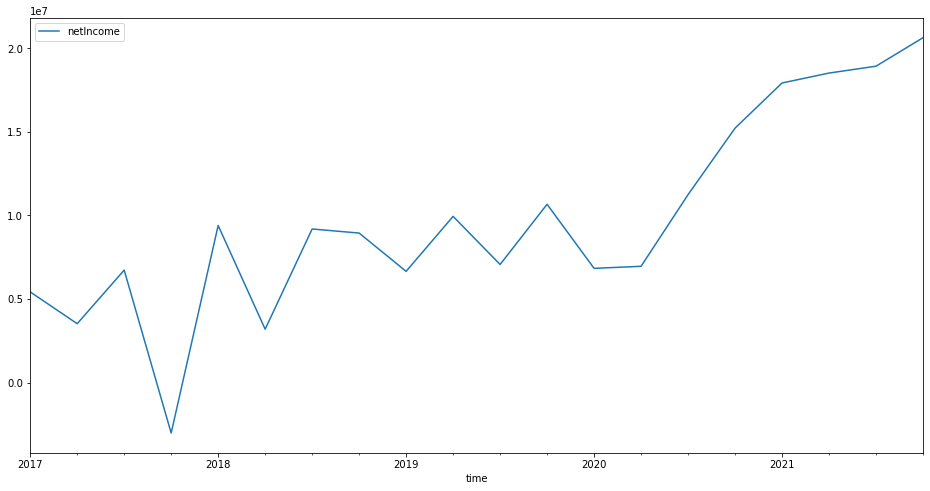

In [18]:
df2.plot(figsize=(16,8))

In [19]:
df2.index

DatetimeIndex(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', freq='Q-DEC')

In [20]:
df2.head()

netIncome
time                 
2017-03-31    5426000
2017-06-30    3524000
2017-09-30    6732000
2017-12-31   -3020000
2018-03-31    9401000

In [21]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,9,30)
test_dataset_end = datetime(2021,12,31)

In [22]:
train_data = df2[:train_dataset_end]
test_data = df2[train_dataset_end+timedelta(days=90):test_dataset_end]

In [23]:
test_data

netIncome
time                 
2020-12-31   15227000
2021-03-31   17930000
2021-06-30   18525000
2021-09-30   18936000
2021-12-31   20642000

<AxesSubplot:xlabel='time'>

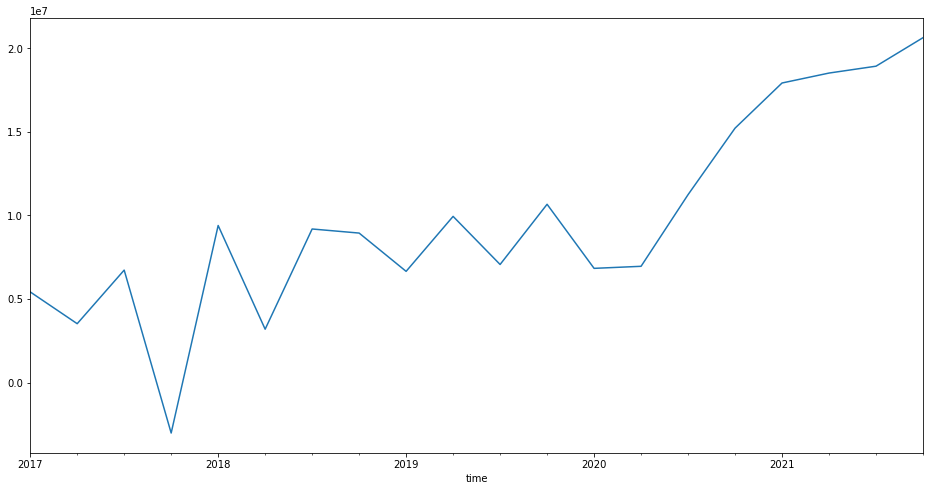

In [24]:
df2['netIncome'].plot(figsize=(16,8))

In [25]:
# Value Columns to be used in all models tuning
val_col = 'netIncome'

In [26]:
# freq and date_col for Prophet
ph_freq='Q'
ph_date_col='time'

## Holt Winters Exponential Smoothing (ETS)



In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_model, best_RMSE, best_ETS_params = find_best_ETS_model(train_data, test_data,\
                                                                 val_col=val_col, seasonal_periods=[4])

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [28]:
best_RMSE, best_ETS_params

(6738966.237540116, ('add', 'add', 4))

In [29]:
test_pred_ETS = best_ETS_model.forecast(len(test_data))
test_pred_ETS

2020-12-31    9.800570e+06
2021-03-31    1.203480e+07
2021-06-30    1.123250e+07
2021-09-30    1.353482e+07
2021-12-31    1.166896e+07
Freq: Q-DEC, dtype: float64

In [30]:
test_data['Predicted_ETS'] = test_pred_ETS

<AxesSubplot:xlabel='time'>

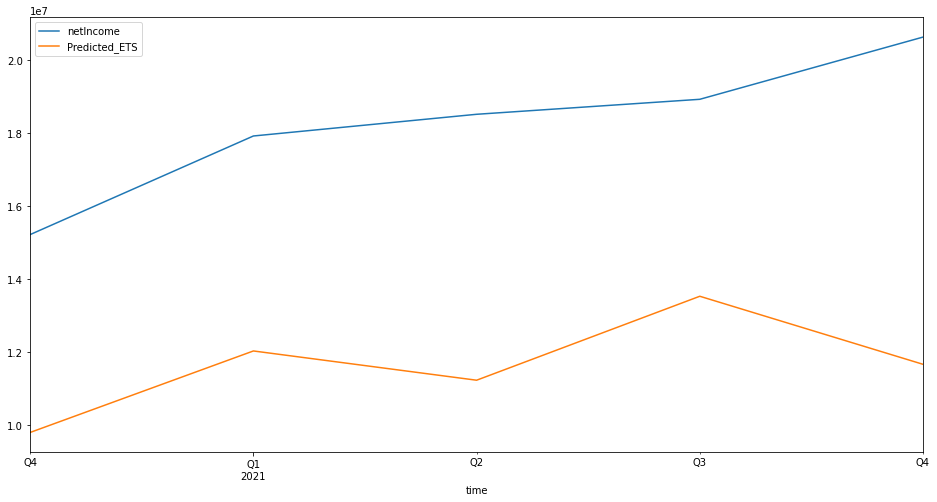

In [31]:
test_data[[val_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA model

In [32]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [33]:
best_ARIMA_model, best_RMSE, best_pdq = find_best_ARIMA_model(train_data, test_data, val_col=val_col)

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wismi\miniconda3\envs\TorchEnv\

In [34]:
best_pdq, best_RMSE

((6, 1, 3), 5392523.952241964)

In [35]:
test_pred_arima = best_ARIMA_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [36]:
test_data['Predicted_ARIMA'] = test_pred_arima

<AxesSubplot:xlabel='time'>

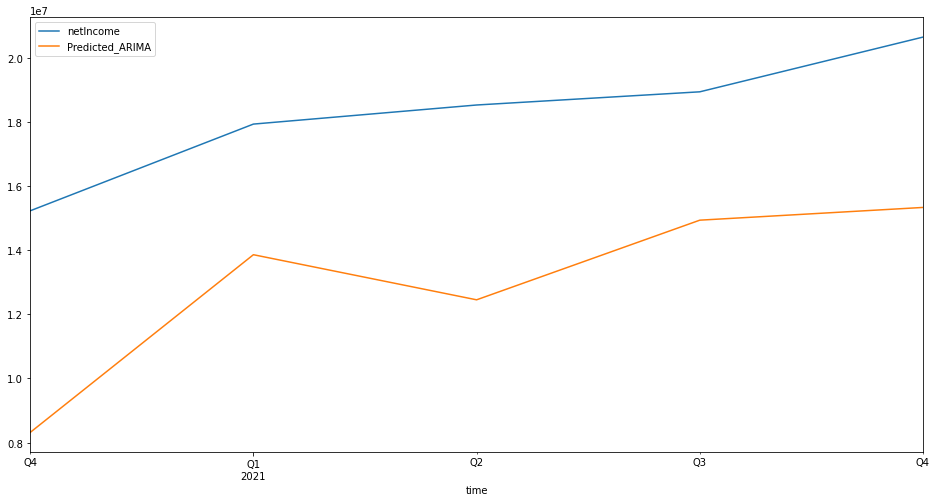

In [37]:
test_data[[val_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

## SARIMAX model

In [38]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# we get best pdq from ARIMA (=best_pdq) and seaonal_period from ETS best params
#seasonal_period = best_ETS_params[2]

seasonal_period = 4

In [40]:
best_SARIMAX_model, best_RMSE, best_PDQS = find_best_SARIMAX_model(train_data, test_data, best_pdq, \
                                                                  val_col=val_col, season_period=seasonal_period)

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
best_RMSE, best_PDQS

(5392523.952241964, (0, 0, 0, 4))

In [42]:
test_pred_SARIMAX = best_SARIMAX_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [43]:
test_data['Predicted_SARIMAX'] = test_pred_SARIMAX

<AxesSubplot:xlabel='time'>

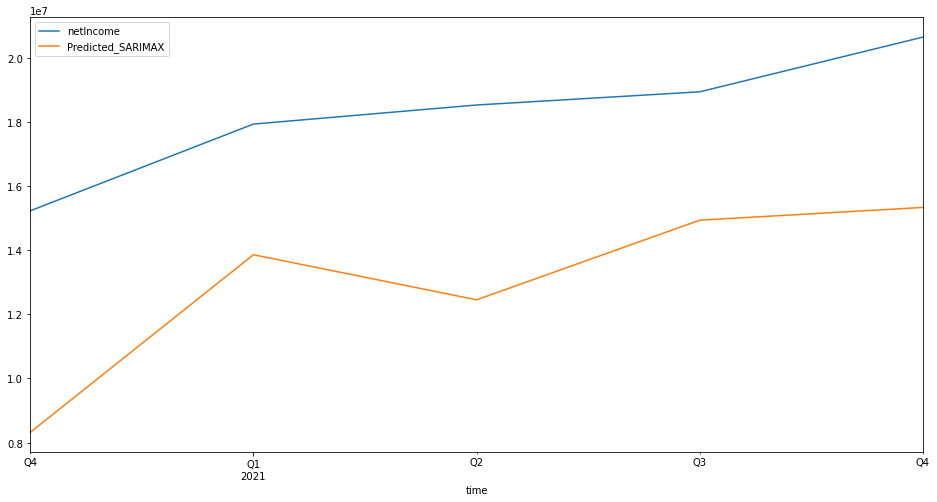

In [44]:
test_data[[val_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Prophet

In [45]:
from prophet import Prophet

In [46]:
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col=ph_date_col, val_col=val_col)

In [47]:
best_Prophet_model, best_RMSE, best_Prophet_params = find_best_Prophet_model(
    proph_train, proph_test, test_data, val_col=val_col,freq=ph_freq)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [48]:
best_Prophet_params, best_RMSE

(('linear', 25, 'additive', 5), 12399427.976041019)

In [49]:
future = best_Prophet_model.make_future_dataframe(periods=len(proph_test), freq=ph_freq)
forecast = best_Prophet_model.predict(future)

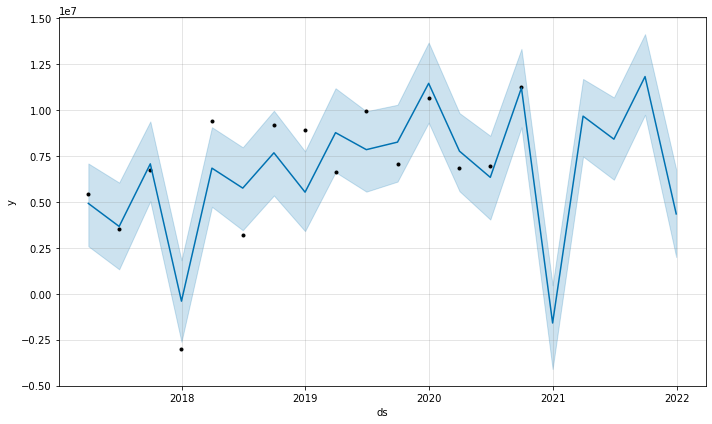

In [50]:
fig1 = best_Prophet_model.plot(forecast)

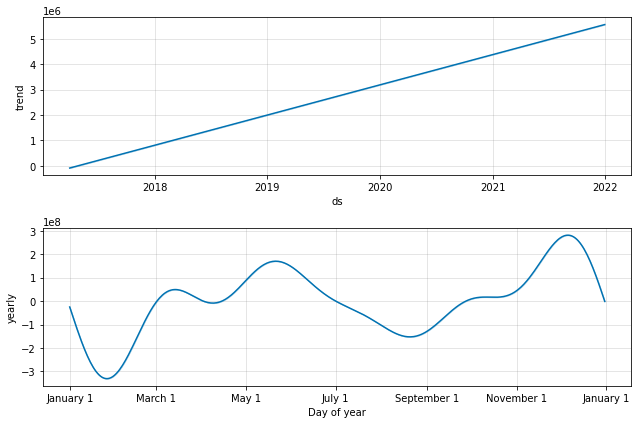

In [51]:
fig2 = best_Prophet_model.plot_components(forecast)

In [52]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

<AxesSubplot:xlabel='time'>

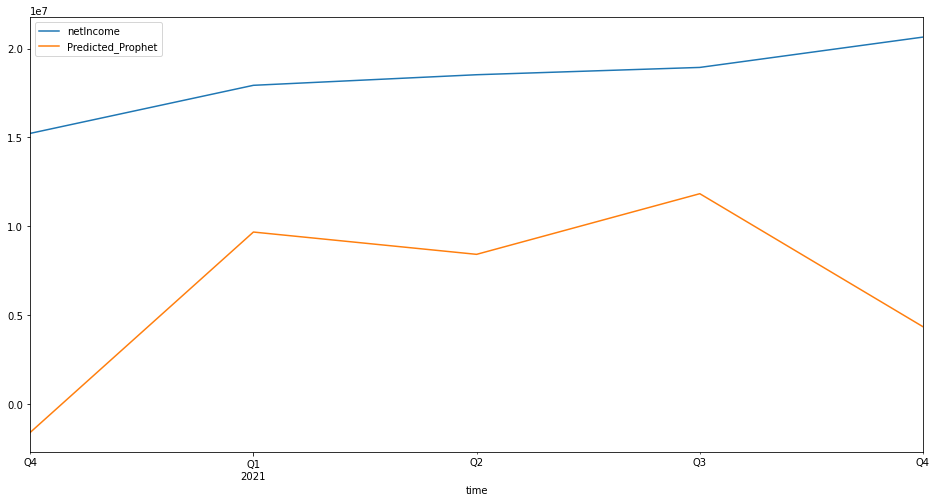

In [53]:
test_data[[val_col, 'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [54]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 45413665950705.58
Mean Absolute Error is : 6597670.713466708
Root Mean Square Error is : 6738966.237540116
Mean Absolute Percentage Error is : 35.974953985991185
R2 score is : -13.641262870183708



In [55]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 29079314575503.29
Mean Absolute Error is : 5272932.147819775
Root Mean Square Error is : 5392523.952241964
Mean Absolute Percentage Error is : 29.54353745802643
R2 score is : -8.375105045403043



In [56]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 29079314575503.29
Mean Absolute Error is : 5272932.147819775
Root Mean Square Error is : 5392523.952241964
Mean Absolute Percentage Error is : 29.54353745802643
R2 score is : -8.375105045403043



In [57]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 153745814133028.7
Mean Absolute Error is : 11712256.065586735
Root Mean Square Error is : 12399427.976041019
Mean Absolute Percentage Error is : 65.48244731563311
R2 score is : -48.56730166543855



### Conclusion:

Based on MSE and MAE values the ARIMA/SARIMAX model provide the best prediction.
But given the R2 score are all negatives on all models, the results are not reliable prediction. 